In [6]:
# Detects the text provided in sms or mail is to be spamed or not.

In [7]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('espam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df.shape

(5572, 5)

# DATA CLEANING

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [12]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
# we dropped the unwanted columns

In [13]:
df.shape

(5572, 2)

In [14]:
df = df.rename(columns={'v1':"target",'v2':"text"})
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [17]:
df['target'] = encoder.fit_transform(df['target'])
df.sample(5)

,target,text
1571,0,Near kalainar tv office.thenampet
284,0,Yeah I think my usual guy's still passed out f...
1208,0,Also maaaan are you missing out
572,0,Can you open the door?
2647,0,"It,,s a taxt massage....tie-pos argh ok! Lool!"


In [18]:
# checking the missing values
df.isnull().sum()

target    0
text      0
dtype: int64

no missing values present

In [20]:
# dropping duplicates
df.shape

(5572, 2)

In [21]:
df.duplicated().sum()

403

In [22]:
df = df.drop_duplicates()
df.shape

(5169, 2)

# EDA (EXPLORATORY DATA ANALYSIS)

In [24]:
df['target'].value_counts()
# 0:is ham
# 1:is spam

target
0    4516
1     653
Name: count, dtype: int64

In [25]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


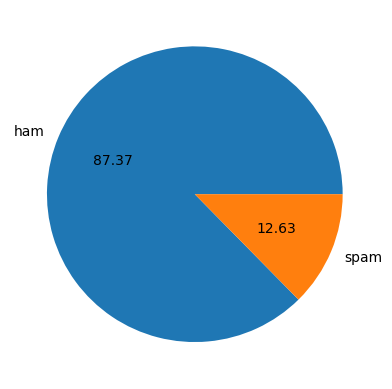

In [26]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [27]:
#  data is imbalenced

In [28]:
import nltk

In [29]:
df['num_text_char'] = df['text'].apply(len)

In [30]:
df.head()

,target,text,num_text_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
# num of words
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [32]:
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [33]:
df['num_text_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_text_char,num_text_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [34]:
df['text'].apply(lambda x:nltk.sent_tokenize(x))  # sent will divide the sentence into small parts

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [35]:
df['num_text_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_text_char,num_text_words,num_text_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
df[['num_text_char','num_text_words','num_text_sentence']].describe()

,num_text_char,num_text_words,num_text_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
df[df['target'] == 0][['num_text_char','num_text_words','num_text_sentence']].describe()
# for ham

,num_text_char,num_text_words,num_text_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
df[df['target'] == 1][['num_text_char','num_text_words','num_text_sentence']].describe()
# for spam

,num_text_char,num_text_words,num_text_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [39]:
import seaborn as sns

<Axes: xlabel='num_text_char', ylabel='Count'>

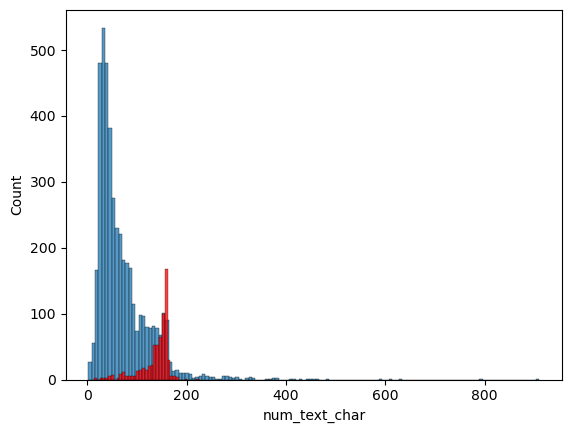

In [40]:
sns.histplot(df[df['target'] == 0]['num_text_char'])
sns.histplot(df[df['target'] == 1]['num_text_char'],color='red')

it shows that the no. of words used in ham is less than compared to spam

<Axes: xlabel='num_text_words', ylabel='Count'>

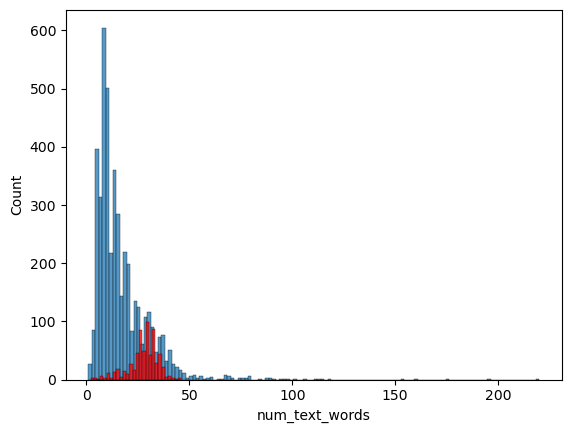

In [42]:
sns.histplot(df[df['target'] == 0]['num_text_words'])
sns.histplot(df[df['target'] == 1]['num_text_words'],color='red')

<Axes: xlabel='num_text_sentence', ylabel='Count'>

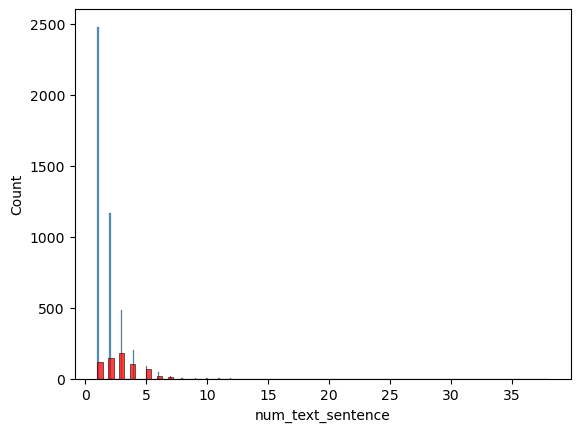

In [43]:
sns.histplot(df[df['target'] == 0]['num_text_sentence'])
sns.histplot(df[df['target'] == 1]['num_text_sentence'],color='red')

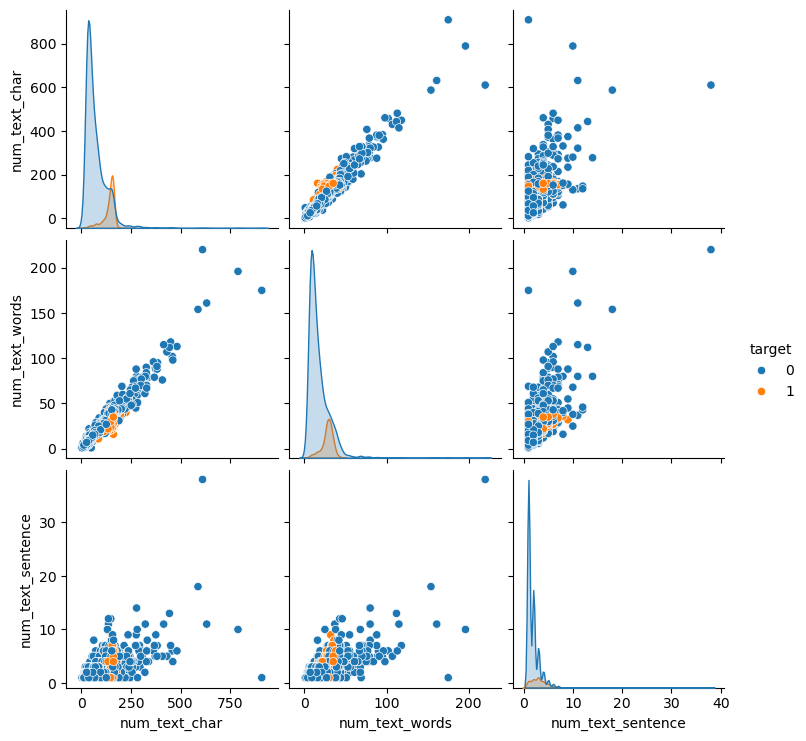

In [44]:
sns.pairplot(df,hue='target')

In [45]:
# data has outliers

In [46]:
df1 = df.drop('text',axis=1)

In [47]:
df1.corr()

,target,num_text_char,num_text_words,num_text_sentence
target,1.000000,0.384717,0.262912,0.263939
num_text_char,0.384717,1.000000,0.965760,0.624139
num_text_words,0.262912,0.965760,1.000000,0.679971
num_text_sentence,0.263939,0.624139,0.679971,1.000000


<Axes: >

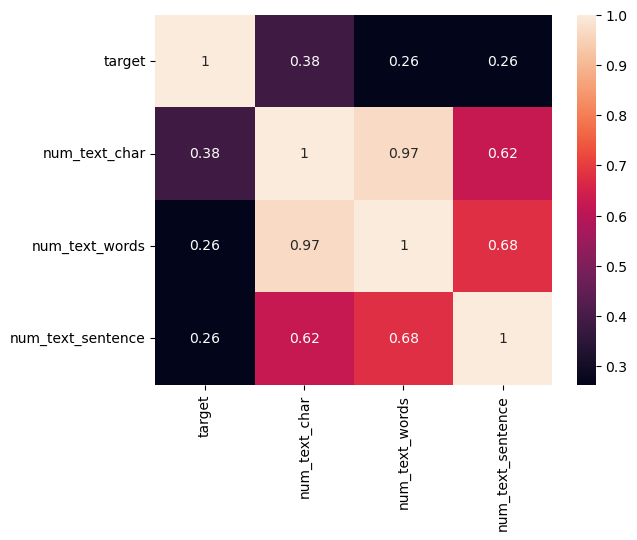

In [48]:
sns.heatmap(df1.corr(),annot=True)

In [49]:
# we will take only num_text_char cause it has less compare to others

In [50]:
#  lets go for the most used words in ham and spam

our data is text (textual data)
# TEXT PREPROCESSING:
1. lowercase
2. tokenizer
3. removing special chars
4. removing stopwords, punctuation marks
5. stemming (ex: dance, dancing, danced  these words are converted in one word as dance)

In [52]:
df.fillna('0')

,target,text,num_text_char,num_text_words,num_text_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [53]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [54]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [55]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [56]:
def tra_txt(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [57]:
df['transformed_text'] = df['text'].apply(tra_txt)

In [58]:
df.head()

,target,text,num_text_char,num_text_words,num_text_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say u dun say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though nah thi...


In [63]:
#pip install wordcloud

In [65]:
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [67]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

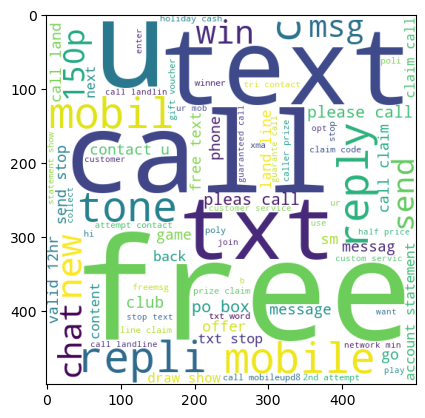

In [69]:
plt.imshow(spam_wc)

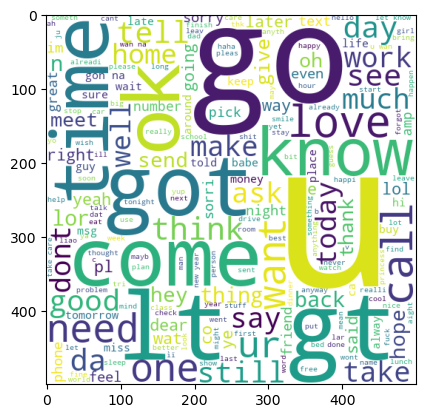

In [71]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [72]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [75]:
len(spam_corpus)

19878

In [77]:
from collections import Counter
Counter(spam_corpus)  # creates dict count

Counter({'call': 622,
         'free': 382,
         '2': 310,
         'txt': 271,
         'u': 238,
         'ur': 238,
         'text': 226,
         'stop': 208,
         'claim': 194,
         '4': 194,
         'prize': 163,
         'get': 144,
         'new': 128,
         'send': 118,
         'mobil': 114,
         'urgent': 114,
         'nokia': 111,
         'contact': 107,
         'mobile': 105,
         'repli': 103,
         'cash': 102,
         'tone': 101,
         'reply': 96,
         'win': 95,
         'phone': 95,
         'c': 90,
         'week': 89,
         'per': 82,
         'award': 79,
         'chat': 74,
         'cs': 70,
         'draw': 69,
         'collect': 66,
         'servic': 64,
         'line': 64,
         'msg': 62,
         'number': 62,
         'go': 61,
         'want': 60,
         'latest': 59,
         '150ppm': 58,
         'min': 58,
         'video': 57,
         '1': 56,
         'offer': 56,
         'code': 54,
         'ho

In [79]:
Counter(spam_corpus).most_common(30)

[('call', 622),
 ('free', 382),
 ('2', 310),
 ('txt', 271),
 ('u', 238),
 ('ur', 238),
 ('text', 226),
 ('stop', 208),
 ('claim', 194),
 ('4', 194),
 ('prize', 163),
 ('get', 144),
 ('new', 128),
 ('send', 118),
 ('mobil', 114),
 ('urgent', 114),
 ('nokia', 111),
 ('contact', 107),
 ('mobile', 105),
 ('repli', 103),
 ('cash', 102),
 ('tone', 101),
 ('reply', 96),
 ('win', 95),
 ('phone', 95),
 ('c', 90),
 ('week', 89),
 ('per', 82),
 ('award', 79),
 ('chat', 74)]

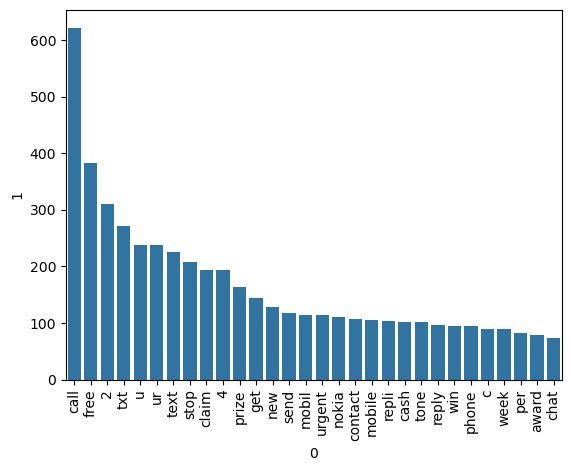

In [81]:
most_common = Counter(spam_corpus).most_common(30)

# Create a DataFrame from the most common counts
common_counts_df = pd.DataFrame(most_common)

# Now, you can plot using the first and second columns
sns.barplot(x=common_counts_df[0], y=common_counts_df[1])

plt.xticks(rotation='vertical')
plt.show()

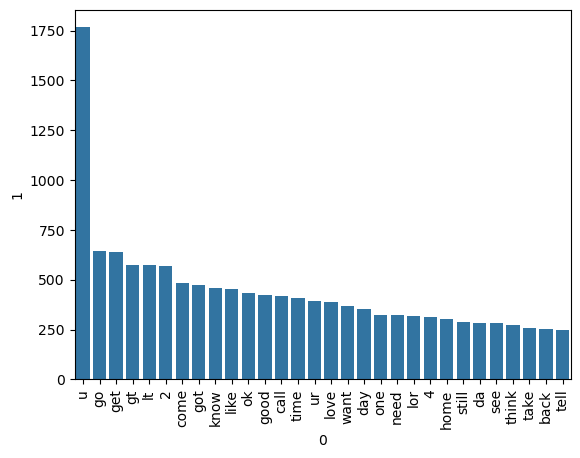

In [83]:
most_common1 = Counter(ham_corpus).most_common(30)

# Create a DataFrame from the most common counts
common_counts_df1 = pd.DataFrame(most_common1)

# Now, you can plot using the first and second columns
sns.barplot(x=common_counts_df1[0], y=common_counts_df1[1])

plt.xticks(rotation='vertical')
plt.show()

# MODEL BUILDING

NAIVE BASE is most used for textual data

our input data is in text so we have to convert it into vector 

In [89]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [91]:
x = cv.fit_transform(df['transformed_text']).toarray()

In [93]:
import pickle
# Save the CountVectorizer
with open('vectorizer_pickle', 'wb') as vectorizer_file:
    pickle.dump(cv, vectorizer_file)


In [95]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [96]:
y = df['target'].values

In [97]:
from sklearn.model_selection import train_test_split

In [101]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [103]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [105]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [106]:
rfc.fit(x_train,y_train)
y_predict = rfc.predict(x_test)
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(precision_score(y_test,y_predict))

0.9700193423597679
[[894   2]
 [ 29 109]]
0.9819819819819819


In [108]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer()
# # def predict_spam(text):
# #     # Vectorize the input text
# #     text_vectorized = cv.transform([text])
# #     # Predict using the trained model
# #     prediction = rfc.predict(text_vectorized)
# #     return "Spam" if prediction == 1 else "Not Spam"

In [109]:
# new_message = input("Enter a message to check if it's spam: ")
# result = predict_spam(new_message)

In [110]:
# print(f"The message is: {result}")

# Pickle File

In [113]:
import pickle

In [114]:
with open('spam_pickle','wb') as f:
    pickle.dump(rfc,f)

In [115]:

# Load the model
# with open('spam_pickle', 'rb') as f:
#     loaded_model = pickle.load(f)

# # Define the `predict_spam` function
# def predict_spam(text):
#     text_vectorized = cv.transform([text])  # Use the same vectorizer
#     prediction = loaded_model.predict(text_vectorized)
#     return "Spam" if prediction == 1 else "Not Spam"

# # Example prediction
# new_message = "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
# result = predict_spam(new_message)
# print(f"The message is: {result}")


In [116]:
# pickle file is working

In [ ]:
!streamlit run stmlit_spam.py